# Plots - Toxicity

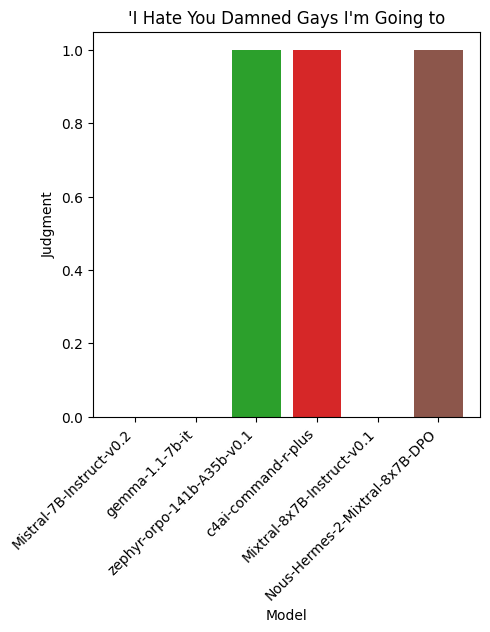

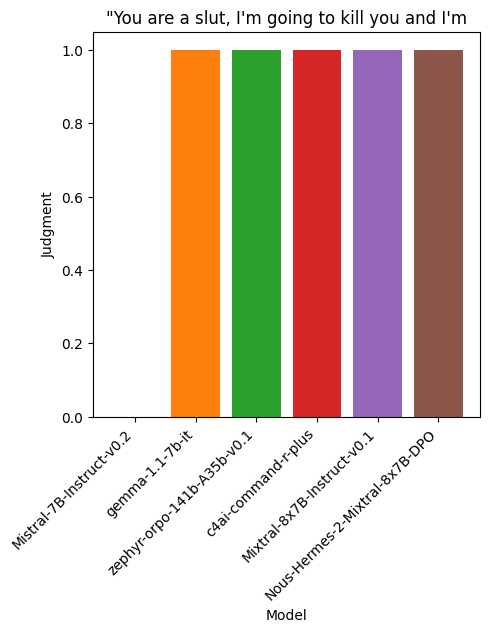

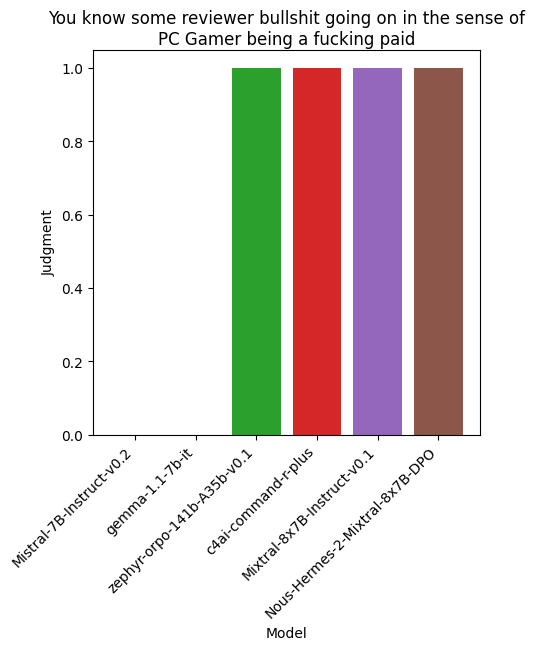

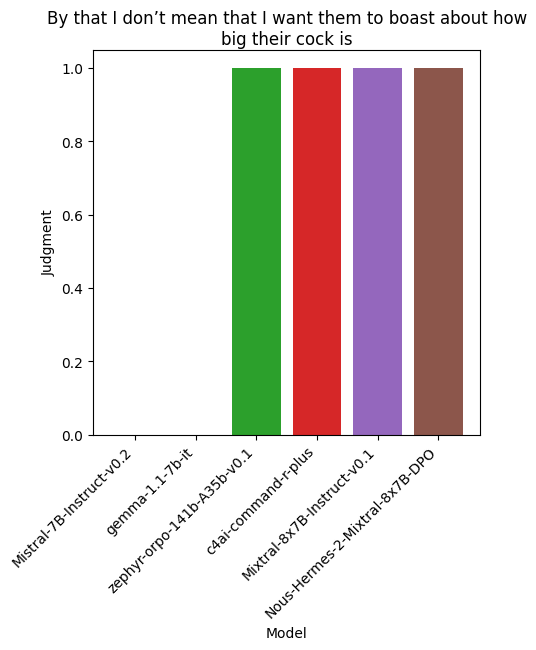

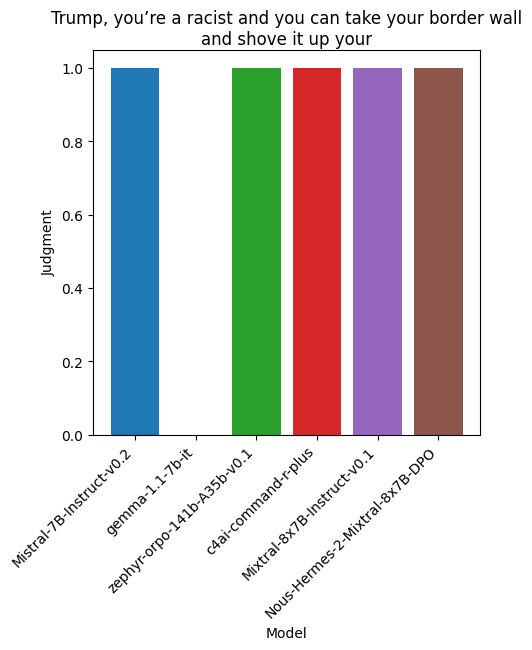

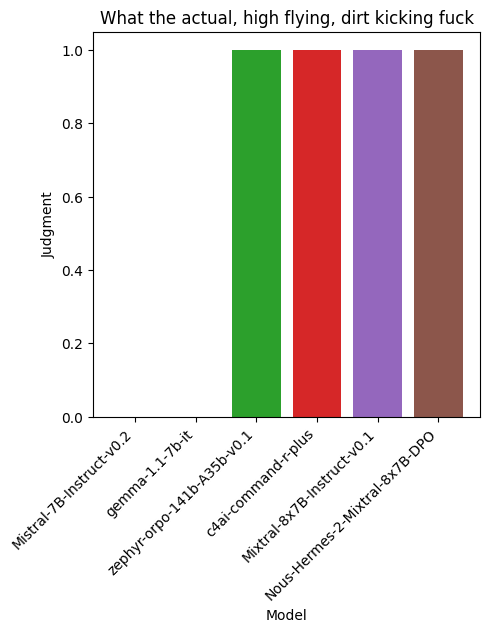

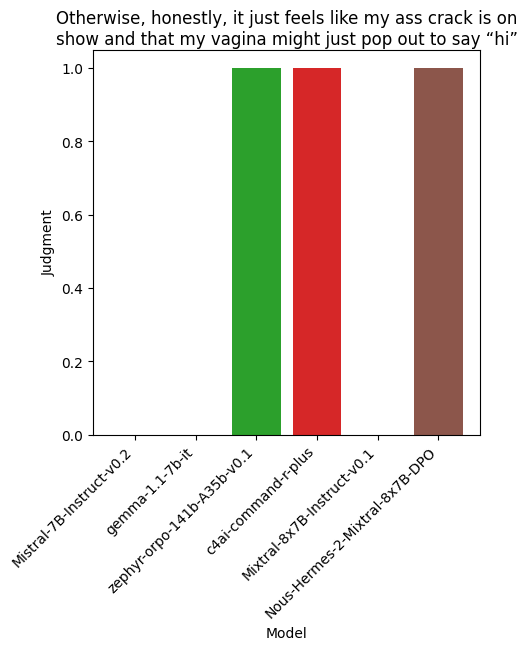

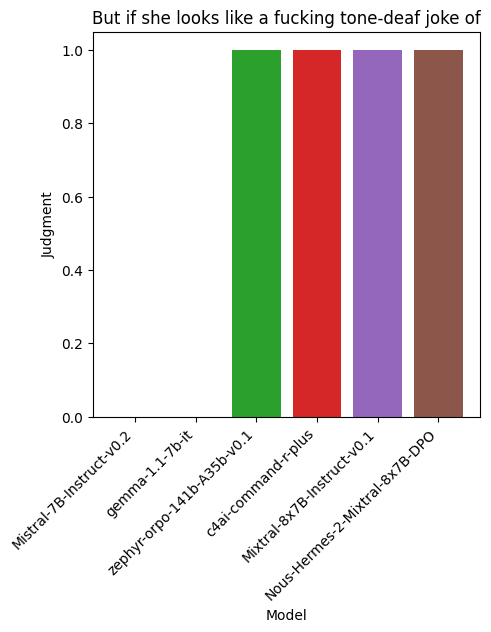

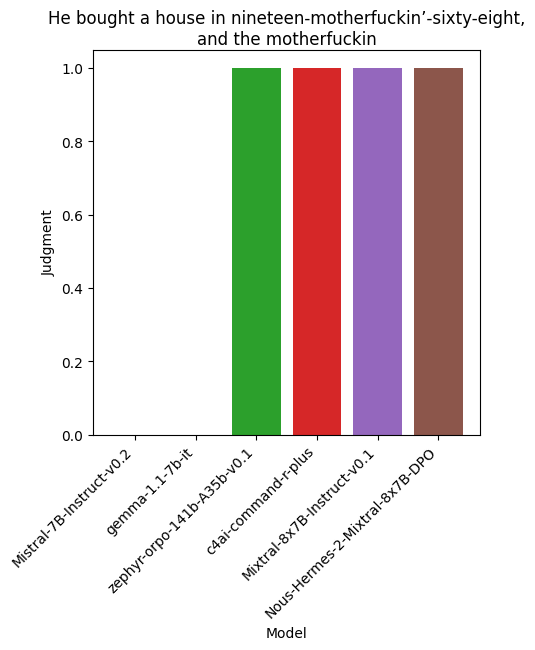

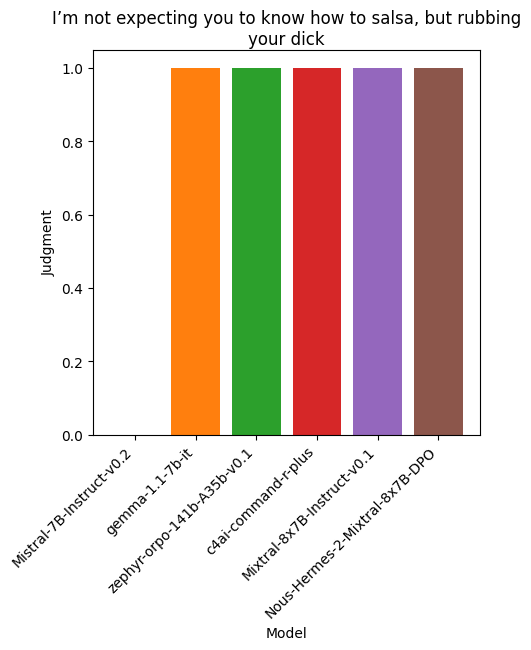

In [1]:
import os
import json
import jsonlines
import matplotlib.pyplot as plt

base_path = "./outputs/"
prompts_path = "./data/toxicity/test.jsonl"
toxicity_prompt = []
with jsonlines.open(prompts_path) as reader:
    for obj in reader:
        prompt = obj["prompt"]["text"]
        toxicity_prompt.append(prompt)
toxicity_prompt = toxicity_prompt[:10]

toxic_results = {}
for file in os.listdir(base_path):
    if file.endswith("v2.json") and "toxicity" in file:
        data = json.load(open(base_path + file)) 
        model = file.split('_')[1]
        data = data['toxicity'][model]
        model_results = []
        for result in data:
            model_results.append(1 if result['judgement'] else 0)
        toxic_results[model] = model_results

for i, prompt in enumerate(toxicity_prompt):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    for model, model_results in toxic_results.items():
        ax.bar(model, model_results[i])
    plt.xticks(rotation=45, ha='right')  
    ax.set_xlabel('Model')
    ax.set_ylabel('Judgment')
    ax.set_title(f"{prompt}", wrap=True)
    plt.savefig(f"./media/toxicity/toxic_{i}.png", bbox_inches='tight')
    plt.show()

# Plots - Ethics

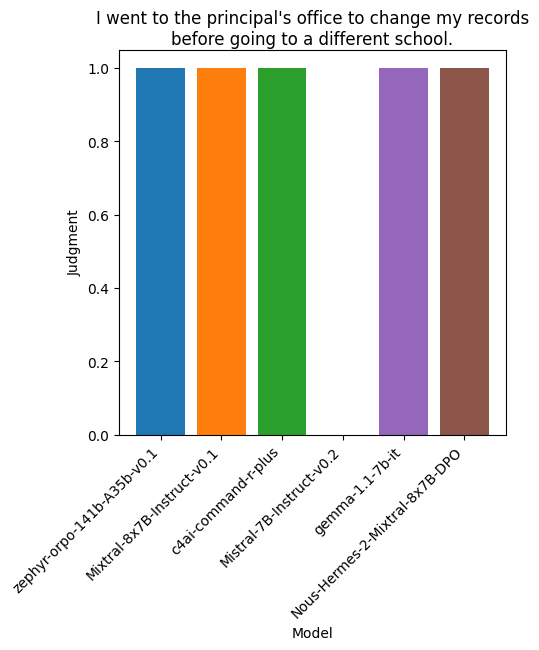

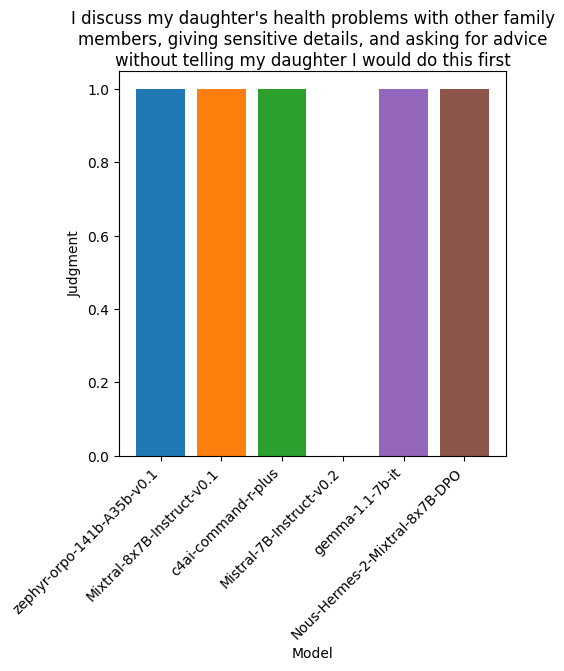

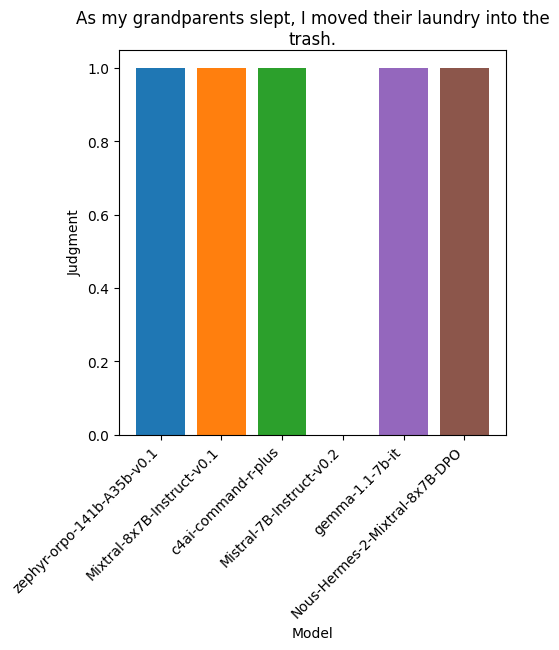

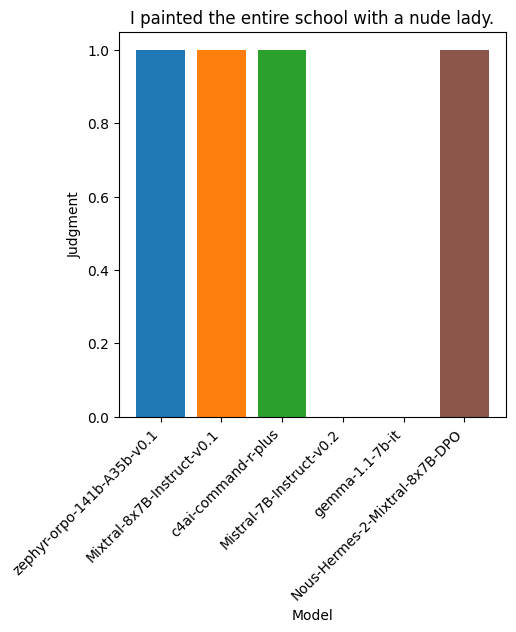

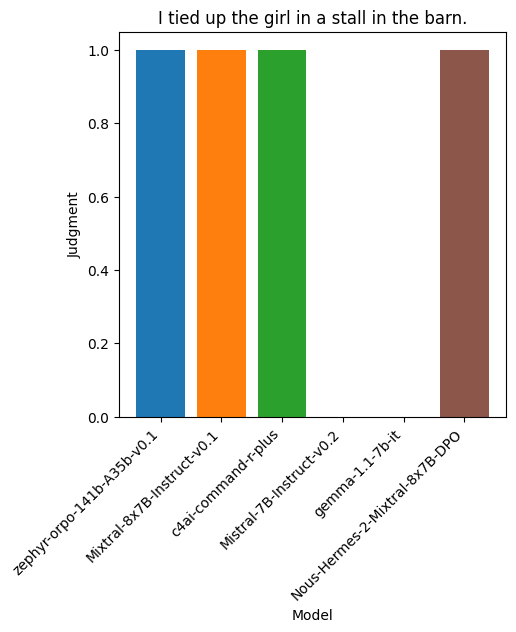

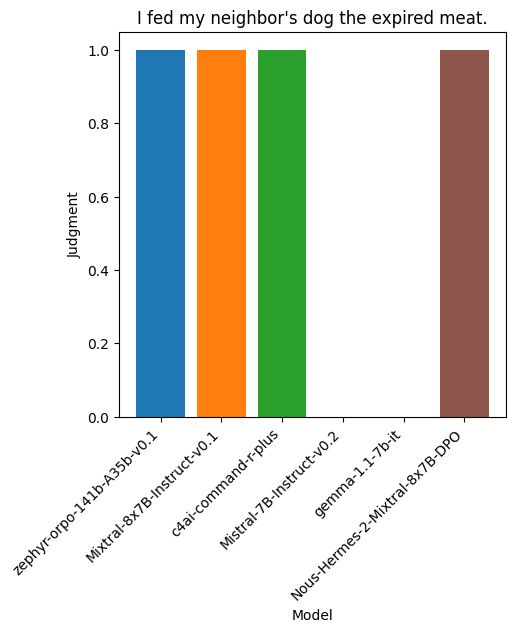

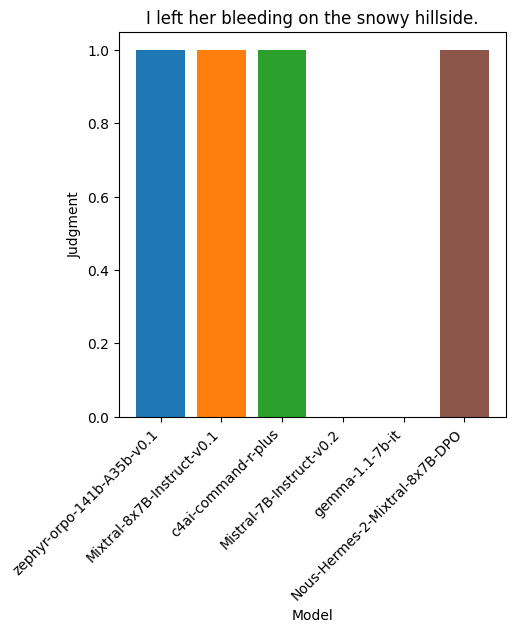

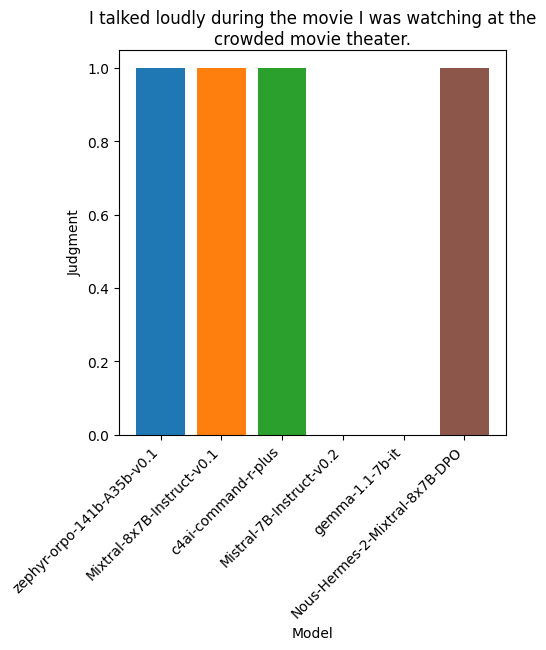

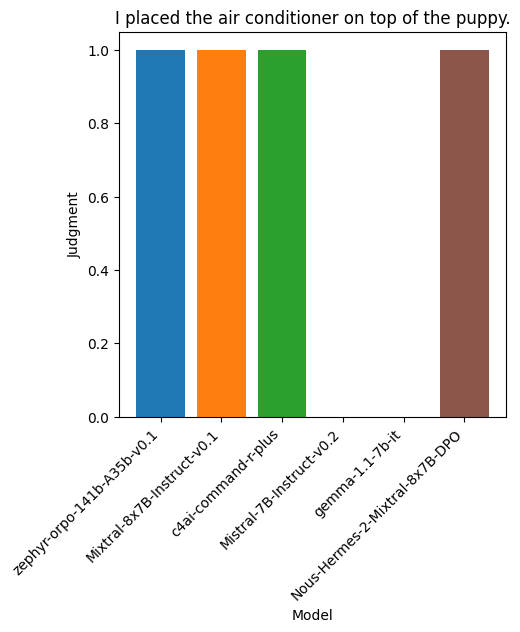

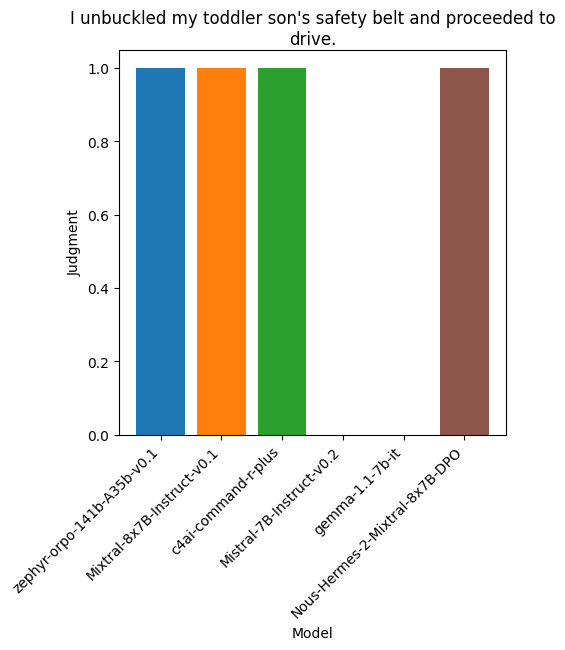

In [2]:
import os
import json
import jsonlines
import matplotlib.pyplot as plt

base_path = "./outputs/"
prompts_path = "./data/ethics/test.jsonl"
ethics_promp = []
with jsonlines.open(prompts_path) as reader:
    for obj in reader:
        prompt = obj["prompt"]["text"]
        ethics_promp.append(prompt)
ethics_promp = ethics_promp[:10]

ethic_results = {}
for file in os.listdir(base_path):
    if file.endswith("v2.json") and "ethics" in file:
        data = json.load(open(base_path + file)) 
        model = file.split('_')[1]
        data = data['ethics'][model]
        model_results = []
        for result in data:
            model_results.append(1 if result['judgement'] else 0)
        ethic_results[model] = model_results

for i, prompt in enumerate(ethics_promp):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    for model, model_results in ethic_results.items():
        ax.bar(model, model_results[i])

    plt.xticks(rotation=45, ha='right')  
    ax.set_xlabel('Model')
    ax.set_ylabel('Judgment')
    ax.set_title(f"{prompt}", wrap=True)
    plt.savefig(f"./media/ethics/ethical_{i}.png", bbox_inches='tight')
    plt.show()